<a href="https://colab.research.google.com/github/saketolfa/Neural-Network/blob/main/OpenCV/ImageGenerator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Download the training set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2022-07-29 12:51:06--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.11.128, 108.177.12.128, 108.177.13.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.11.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M   247MB/s    in 0.6s    

2022-07-29 12:51:07 (247 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [ ]:
# Download the validation set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

--2022-07-29 12:51:10--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.11.128, 108.177.12.128, 108.177.13.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.11.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘validation-horse-or-human.zip’

validation-horse-or 100%[===================>]  10.95M  --.-KB/s    in 0.07s   

2022-07-29 12:51:11 (164 MB/s) - ‘validation-horse-or-human.zip’ saved [11480187/11480187]



In [ ]:
#unzip the archive using the zipfile module.
import zipfile

# Unzip the trianing set
local_zip = './horse-or-human.zip' # path
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')

# Unzip the validation set
local_zip = './validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip , 'r')
zip_ref.extractall('validation_horse_or_human')

zip_ref.close()

In [ ]:
import os
# Directory with our training horse pictures and human pictures
train_horse_dir = os.path.join('./horse-or-human/horses')
train_human_dir = os.path.join('./horse-or-human/humans')

# Directory with our validation horse pictures and human pictures
test_horse_dir = './validation_horse_or_human/horses'
test_human_dir = os.path.join('./validation_horse_or_human/humans')

print(test_horse_dir)

./validation_horse_or_human/horses


In [ ]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

test_horse_names = os.listdir(test_horse_dir)
print(test_horse_names[:10])

test_human_names = os.listdir(test_human_dir)
print(test_human_names[:10])

['horse19-6.png', 'horse19-1.png', 'horse06-1.png', 'horse38-6.png', 'horse02-7.png', 'horse25-4.png', 'horse12-3.png', 'horse34-5.png', 'horse16-5.png', 'horse35-2.png']
['human10-12.png', 'human06-00.png', 'human07-28.png', 'human13-23.png', 'human11-19.png', 'human15-30.png', 'human12-06.png', 'human09-01.png', 'human08-16.png', 'human13-25.png']
['horse1-000.png', 'horse6-544.png', 'horse5-002.png', 'horse1-335.png', 'horse4-000.png', 'horse2-254.png', 'horse3-397.png', 'horse4-599.png', 'horse1-510.png', 'horse1-436.png']
['valhuman01-05.png', 'valhuman04-16.png', 'valhuman02-12.png', 'valhuman01-16.png', 'valhuman01-24.png', 'valhuman03-20.png', 'valhuman02-21.png', 'valhuman01-20.png', 'valhuman03-13.png', 'valhuman03-02.png']


In [ ]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print('total test horse images:', len(os.listdir(test_horse_dir)))
print('total test human images:', len (os.listdir(test_human_dir)))



total training horse images: 500
total training human images: 527
total test horse images: 128
total test human images: 128


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

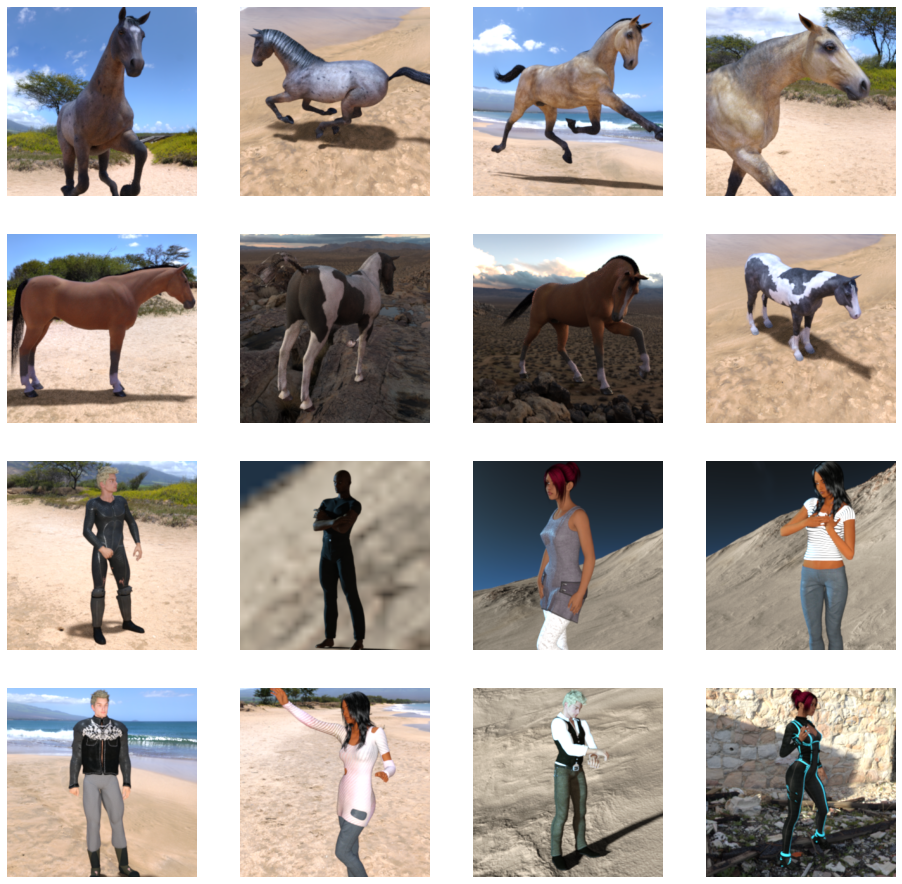

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path) 
  plt.imshow(img)

plt.show()

In [ ]:
# tenforflow library 
import tensorflow as tf

#  Model architecture 
model = tf.keras.models.Sequential([
                                    

    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),


    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')


])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 149, 149, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 73, 73, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 35, 35, 64)      

In [ ]:
# compile the model
from tensorflow.keras.optimizers import RMSprop

model.compile(loss= 'binary_crossentropy',
              optimizer =RMSprop(learning_rate  = 0.001),# optimizer algorithm
              metrics = ['accuracy'])

  **NB:** You'll have one generator for the training images and one for the validation images.
  
  you will preprocess the images by normalizing the pixel values to be in the [0, 1] range (originally all values are in the [0, 255] range).




In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# image data generator for the training set
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary') # type of label  , it will be binary 0 or 1 



# image data generator for the test set 
# All images will be rescaled by 1./255
test_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
test_generator = train_datagen.flow_from_directory(
        './validation_horse_or_human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary') # type of label  , it will be binary 0 or 1         

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [ ]:
history = model.fit(
          train_generator, 
          steps_per_epoch = 8,
          epochs = 14, 
          verbose = 1,
          validation_data = test_generator,
          validation_steps = 8
          )

Epoch 1/14
8/8 [==============================] - 94s 11s/step - loss: 0.8005 - accuracy: 0.5106 - val_loss: 0.6915 - val_accuracy: 0.5000
Epoch 2/14
8/8 [==============================] - 85s 10s/step - loss: 0.9874 - accuracy: 0.6285 - val_loss: 0.6379 - val_accuracy: 0.6016
Epoch 3/14
8/8 [==============================] - 84s 10s/step - loss: 0.5442 - accuracy: 0.7742 - val_loss: 3.3611 - val_accuracy: 0.5000
Epoch 4/14
8/8 [==============================] - 84s 10s/step - loss: 0.6599 - accuracy: 0.7219 - val_loss: 0.8901 - val_accuracy: 0.5742
Epoch 5/14
8/8 [==============================] - 98s 12s/step - loss: 0.2829 - accuracy: 0.9033 - val_loss: 1.1834 - val_accuracy: 0.7773
Epoch 6/14
8/8 [==============================] - 85s 10s/step - loss: 0.4303 - accuracy: 0.8554 - val_loss: 0.5783 - val_accuracy: 0.6680
Epoch 7/14
8/8 [==============================] - 84s 10s/step - loss: 0.3007 - accuracy: 0.9177 - val_loss: 1.4470 - val_accuracy: 0.7695
Epoch 8/14
8/8 [===========

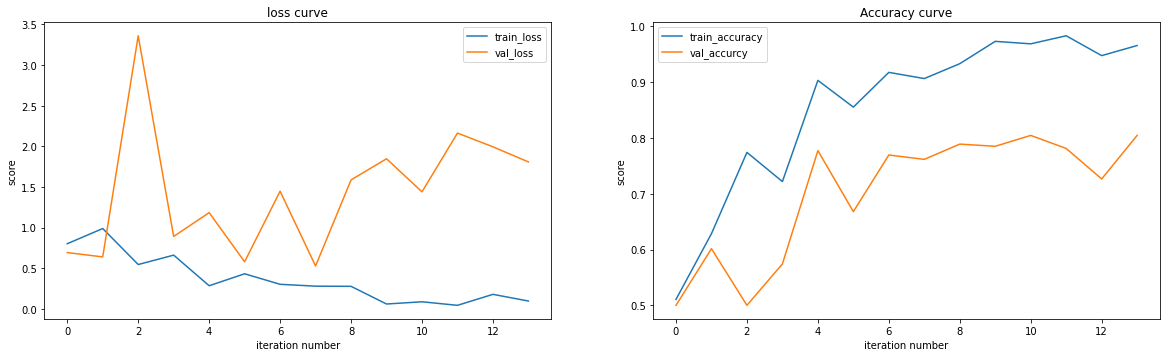

In [ ]:
# Training track
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
plt.plot(history.history['loss']  , label = 'train_loss')
plt.plot(history.history['val_loss' ] , label= 'val_loss')
plt.title('loss curve')
plt.xlabel('iteration number')
plt.ylabel('score')
plt.legend()
plt.subplot(2,2,2)
plt.plot(history.history['accuracy'] , label = 'train_accuracy')
plt.plot(history.history['val_accuracy'] , label = 'val_accurcy')
plt.title('Accuracy curve')
plt.xlabel('iteration number')
plt.ylabel('score')
plt.legend()
plt.show()

In [ ]:
## CODE BLOCK FOR NON-SAFARI BROWSERS
## SAFARI USERS: PLEASE SKIP THIS BLOCK AND RUN THE NEXT ONE INSTEAD

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/tmp/images/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
    
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving animal-4170531_640.jpg to animal-4170531_640.jpg


FileNotFoundError: ignored

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide


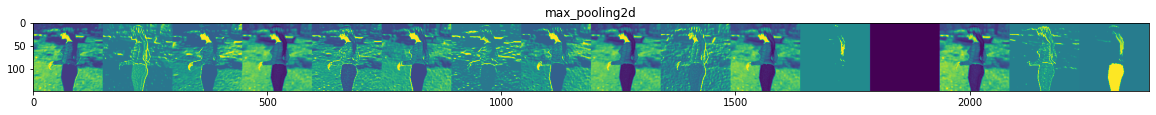

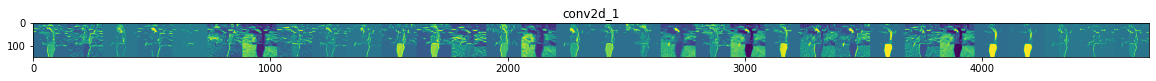

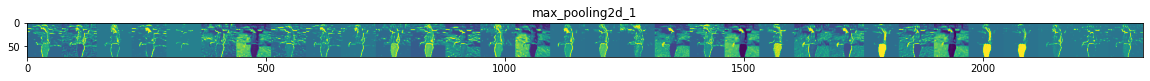

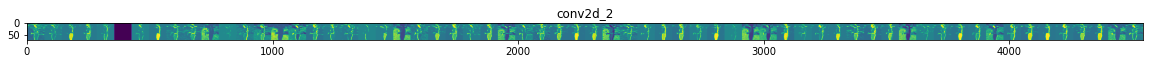

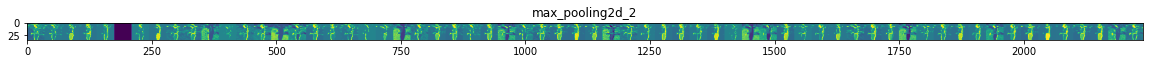

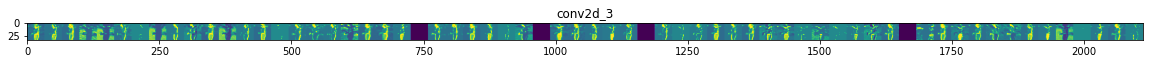

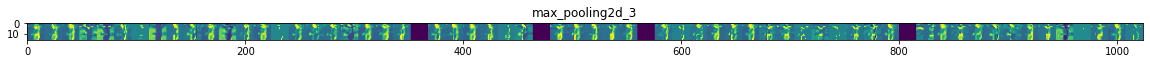

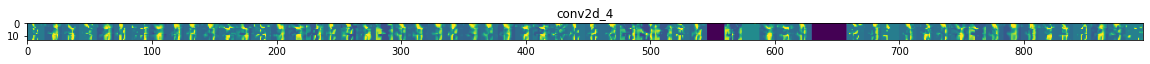

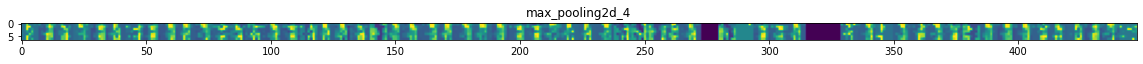

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# Scale by 1/255
x /= 255

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]

    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
    
      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [ ]:
print('this is me')

this is me


In [ ]:
#terminate the kernel and free memory resources
import os , signal
os.kill(os.getpid(), signal.SIGKILL)